In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
from src import measure_repository
from src import repository_adapter
from matplotlib.dates import  DateFormatter
from matplotlib.dates import YearLocator
from scipy.ndimage import gaussian_filter
import numpy as np


# Wroclaw al. Wisniowa - PM 2.5 

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


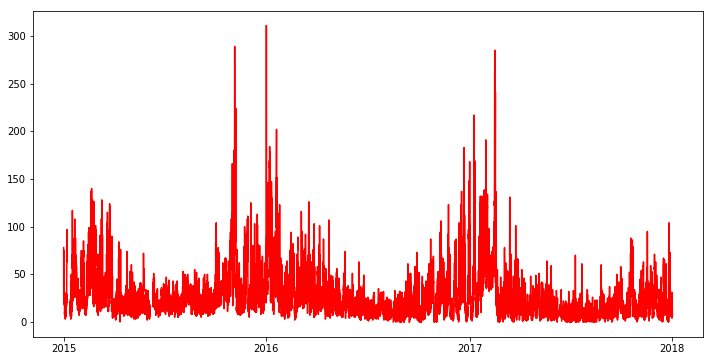

In [3]:
wroclaw = 2
plt.rcParams['figure.figsize'] = [12,6]
fig, ax = plt.subplots()

result = measure_repository.get_measures(wroclaw, '2014-12-31', '2018-01-01')
plt.plot_date(result['date'], result['value'], xdate=True, ydate=False, color="red", label="Wroclaw",linestyle='solid', marker='None')
ax.xaxis.set_major_locator(YearLocator())
plt.show()

- wyrysowac przebieg roczny dla wszystkich na 1 wykresie (filtrowac po miesiacu)
- kazdy tydzien nalozony na 1 wykresie 
- przebieg dobowy na 1 wykresie (w najgorszym miesiacu)
- 



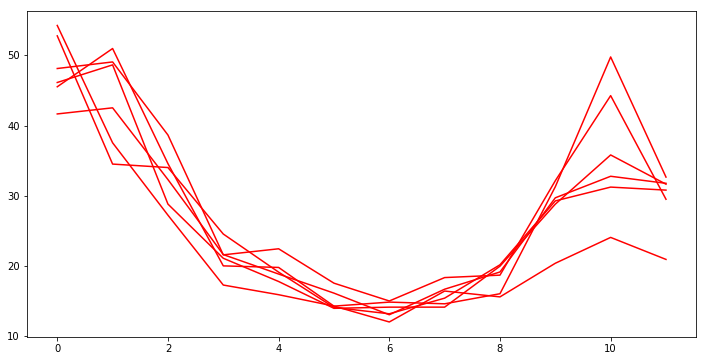

In [4]:
wroclaw = 2
plt.rcParams['figure.figsize'] = [12,6]
fig, ax = plt.subplots()


def get_data(index):
    return repository_adapter.run_sql(
        """ SELECT
                AVG(result) as value,            
                date as date
            FROM air.air_quality_measures
            WHERE 
                metering_point_id = %s
                AND result IS NOT NULL
                AND WEEKDAY(date) IN (%s)
            GROUP BY MONTH(date),WEEKDAY(date)
            ORDER BY date ASC
            ;""" % (wroclaw, index),
        ["value", "date"]
    )

current_var = 0
while current_var < 7: 
    current_var = current_var + 1
    result = get_data(current_var)
    plt.plot(result['value'],  color="red", label="Wroclaw",linestyle='solid', marker='None')


plt.show()

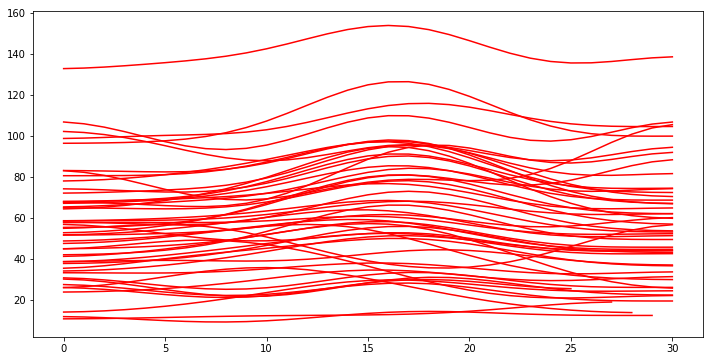

In [5]:
plt.rcParams['figure.figsize'] = [12,6]
fig, ax = plt.subplots()

def get_data(metering_point_id):
    return repository_adapter.run_sql(
        """ SELECT
                SUM(result) as value,            
                date as date
            FROM air.air_quality_measures
            WHERE 
                metering_point_id = %s
                AND result IS NOT NULL
                AND MONTH(date) IN (12)
                AND HOUR(date) IN (7)
            GROUP BY MONTH(date),DAY(date)
            ORDER BY date ASC
            ;""" % (metering_point_id),
        ["value", "date"]
    )

customer = 0
while customer < 49: 
    customer = customer + 1

    result = get_data(customer)
    result = result['value']
    result = np.asarray(result.values).astype(float)
    result = gaussian_filter(result, sigma=5)
    plt.plot(result,  color="red", linestyle='solid', marker='None')


plt.show()